# Read traveltime field and adjoint field.

In [1]:
from pytomoatt.data import ATTData
import numpy as np

In [2]:
# file to be read
input_file = 'OUTPUT_FILES/OUTPUT_FILES_fields/out_data_sim_group_1.h5'
# input parameters file
par_file = '3_input_params/input_params_inv.yaml'
# grid file
grid_file = 'OUTPUT_FILES/OUTPUT_FILES_fields/out_data_grid.h5'

# read traveltime field
group   = "src_s1"          # "src_$src_name"
dataset = "T_res_inv_0000"  # "T_res_inv_$iter"
data = ATTData.read(input_file, par_file, grid_file, group, dataset)
time_field = data.to_xarray()

# we can access 3D time field data by
time_field_data = time_field[dataset]
print("3D time field array shape: ", time_field_data.shape)

# or we can interp it to a 2D slice at depth
depth = 0.0
tmp = time_field.interp_dep(depth, field=dataset)
lon   = tmp[:,0]
lat   = tmp[:,1]
time  = tmp[:,2]

# Similarly, we can do the same for adjoint field
dataset = "adjoint_field_inv_0000"  # "adjoint_field_inv_$iter"
data = ATTData.read(input_file, par_file, grid_file, group, dataset)
adjoint_field = data.to_xarray()

# we can access 3D adjoint field data by
adjoint_field_data = adjoint_field[dataset]

# or we can interp it to a 2D slice at depth
depth = 0.0
adjoint = adjoint_field.interp_dep(depth, field=dataset)[:,2]

3D time field array shape:  (7, 201, 201)


In [6]:
import sys
sys.path.append('../utils/')
import functions_for_plot as ffp

# Pygmt plot time field and adjoint field

surface [WARNING]: 30200 unusable points were supplied; these will be ignored.
surface [WARNING]: You should have pre-processed the data with block-mean, -median, or -mode.
surface [WARNING]: Check that previous processing steps write results with enough decimals.
surface [WARNING]: Possibly some data were half-way between nodes and subject to IEEE 754 rounding.


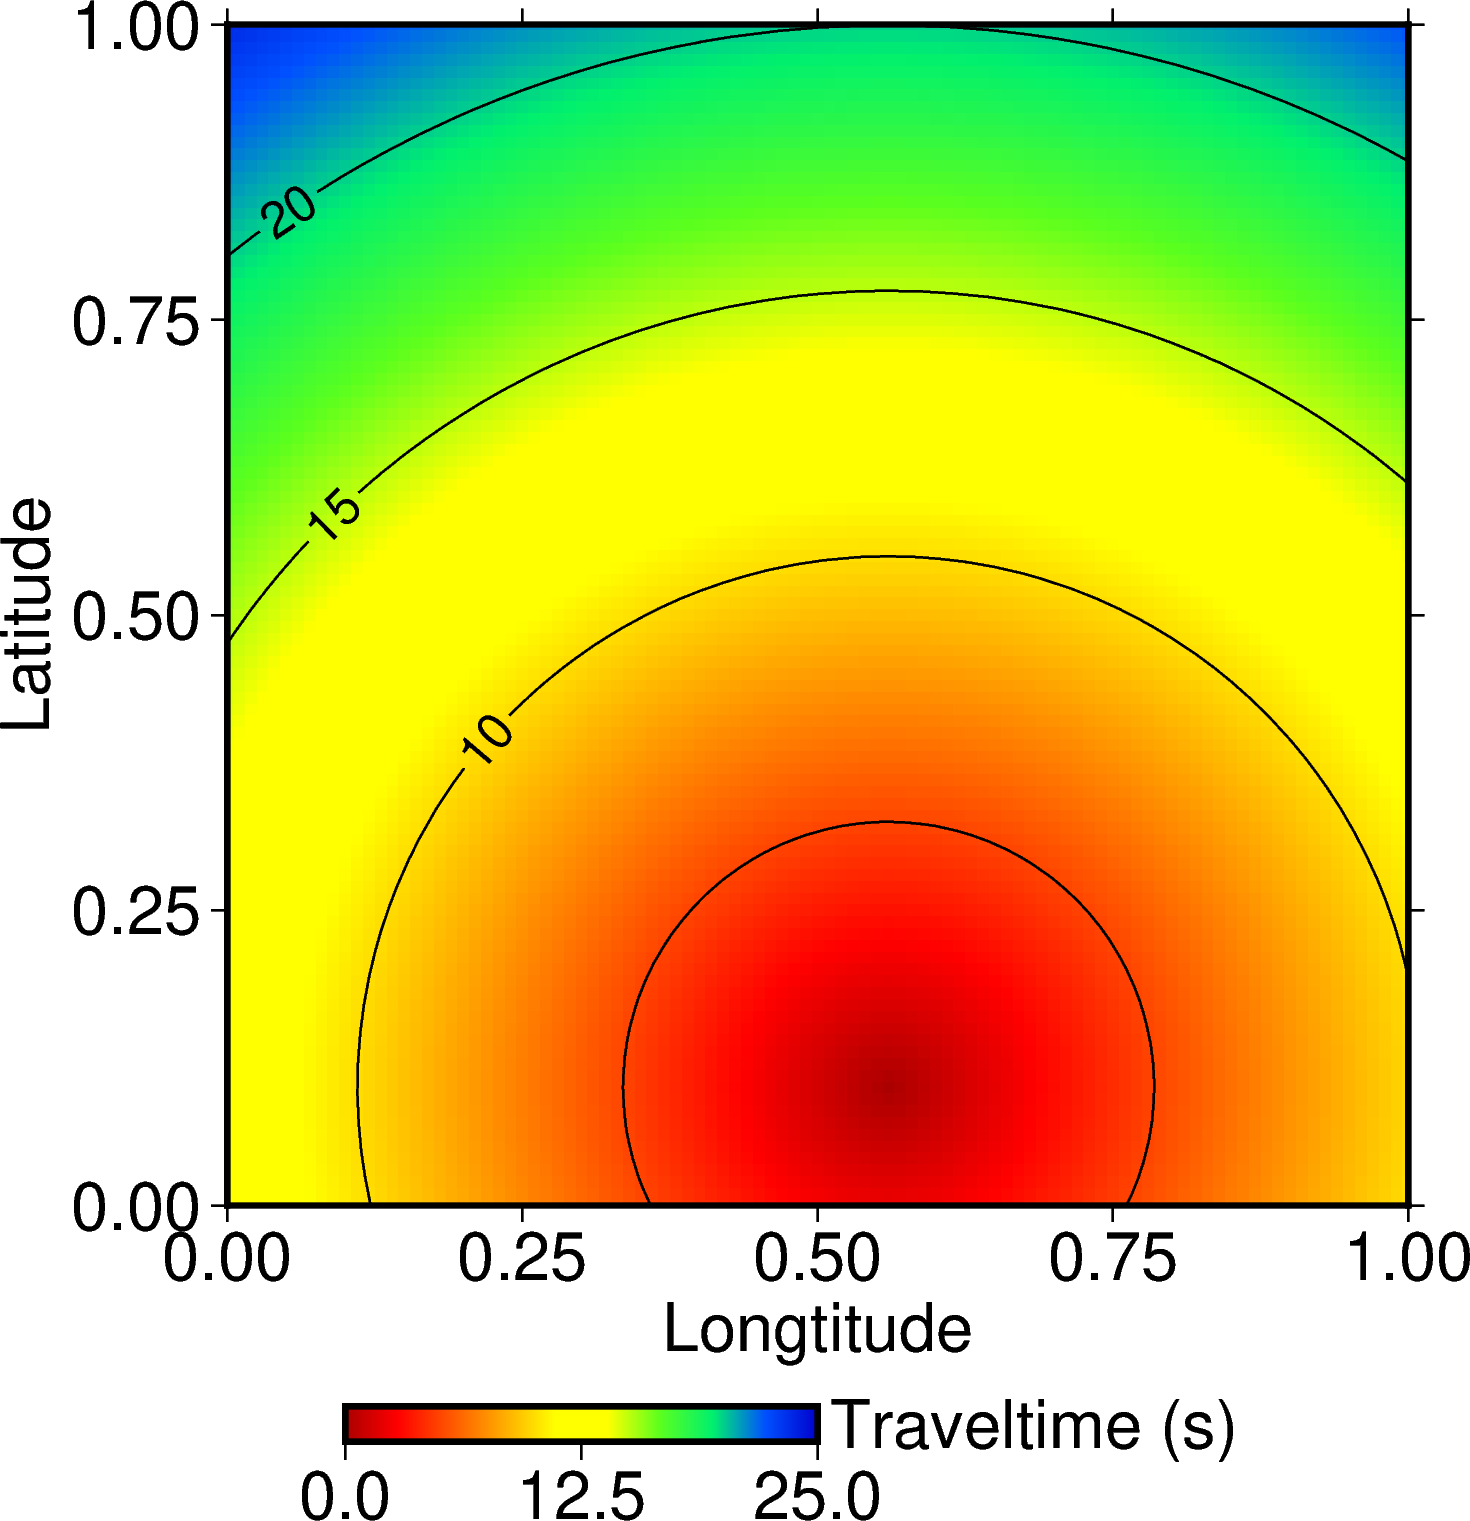

surface [WARNING]: 30200 unusable points were supplied; these will be ignored.
surface [WARNING]: You should have pre-processed the data with block-mean, -median, or -mode.
surface [WARNING]: Check that previous processing steps write results with enough decimals.
surface [WARNING]: Possibly some data were half-way between nodes and subject to IEEE 754 rounding.


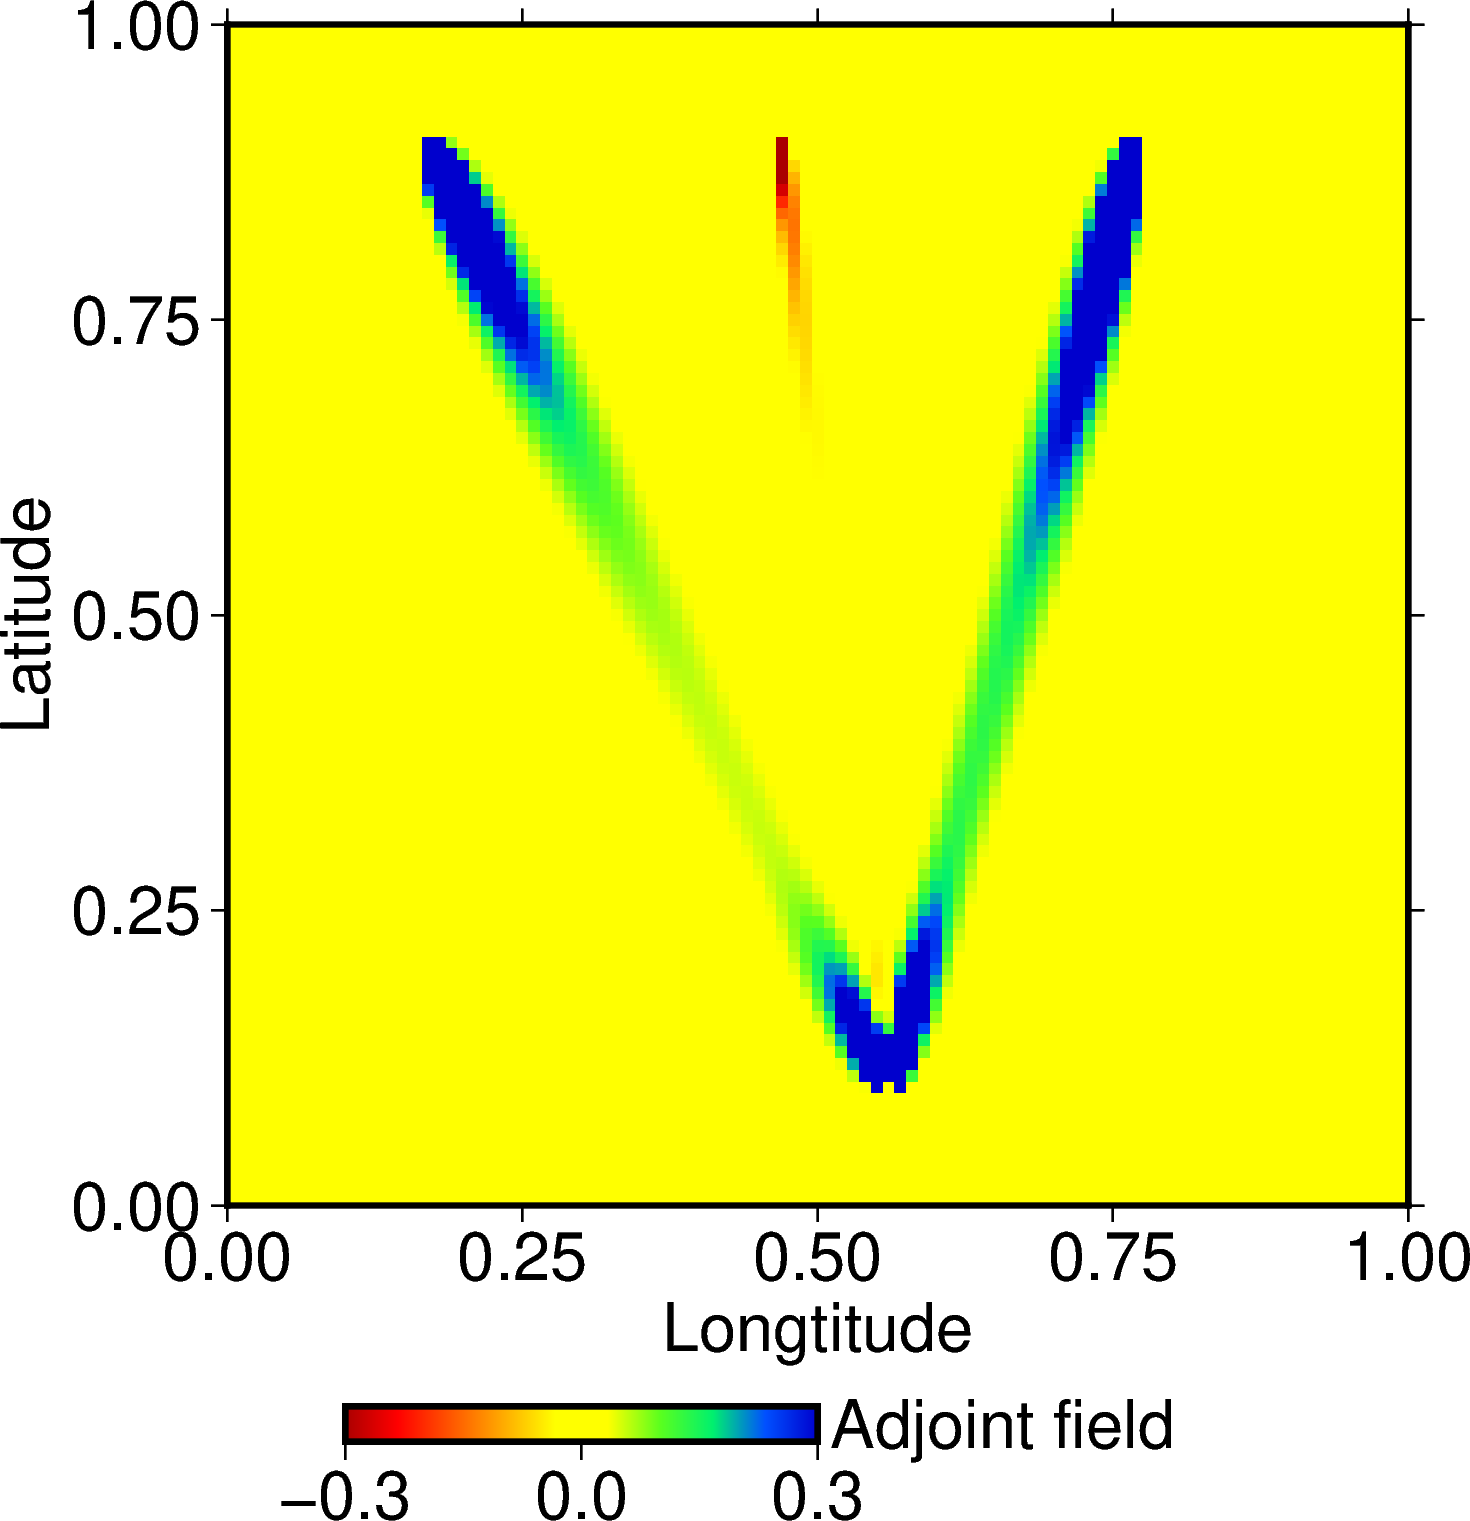

In [8]:
# pygmt plot
import pygmt
pygmt.config(FONT="16p", IO_SEGMENT_MARKER="<<<")

region = [0,1,0,1]
projection = "X10c/10c"
frame = ["xa0.5+lLongitude", "ya0.5+lLatitude", "nSWe"]

fig = pygmt.Figure()

# ----------- plot time field ------------
pygmt.makecpt(cmap="seis", series=[0, 30], background=True, reverse=False)
grid = pygmt.xyz2grd(x=lon, y=lat, z=time, spacing=0.005,region=region,)
fig.grdimage(frame=frame,grid = grid,projection=projection, region=region) # nan_transparent may work
fig.contour(x=lon, y=lat, z=time, levels=5, pen="1p,black", annotation="5+f12p")

fig.shift_origin(xshift= 1, yshift=-2)
fig.colorbar(frame = ["a%f"%(10),"y+lTraveltime (s)"], position="+w4c/0.3c+h") # +e,默认是双箭头，f表示forward，b表示background ，w表示长宽，h表示水平
fig.shift_origin(xshift=-1, yshift=+2)

dx = 0.01; dy = 0.01

fname = 'img/3a_traveltime.png'
fig = ffp.plot_map(lon,lat,time,dx,dy,
            fname = fname, 
            contour = True,
            levels = 5,
            axis_label = ["Longtitude","Latitude"],
            colorbar = "Traveltime (s)",
            cpt_range = [0,25],)

fname = 'img/3b_adjoint.png'
fig = ffp.plot_map(lon,lat,adjoint,dx,dy,
            fname = fname, 
            axis_label = ["Longtitude","Latitude"],
            colorbar = "Adjoint field",
            cpt_range = [-0.3,0.3],)